In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
tesla_stock = yf.download(tickers="TSLA",period="600d",interval="60m",auto_adjust=True)
tesla_stock.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2022-11-29 13:30:00,180.673706,181.089996,179.179993,180.279999,10348072
2022-11-29 14:30:00,180.308899,180.589996,178.750000,180.220001,8207695
2022-11-29 15:30:00,180.248703,181.000000,179.889999,180.820007,5060082
2022-11-30 09:30:00,182.429993,185.460007,182.429993,183.729996,12736923
2022-11-30 10:00:21,183.399994,183.399994,183.399994,183.399994,0


In [2]:
df=tesla_stock[['Close']]
df['Prediction']=df[['Close']].shift(-15)
df.head()

C:\Users\rohit\AppData\Local\Temp\ipykernel_2044\637903304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Close']].shift(-15)


,Close,Prediction
Datetime,,
2020-07-16 09:30:00,98.874542,100.010094
2020-07-16 10:30:00,99.104004,101.716667
2020-07-16 11:30:00,99.399330,105.770004
2020-07-16 12:30:00,101.683334,107.672699
2020-07-16 13:30:00,100.930000,109.234665


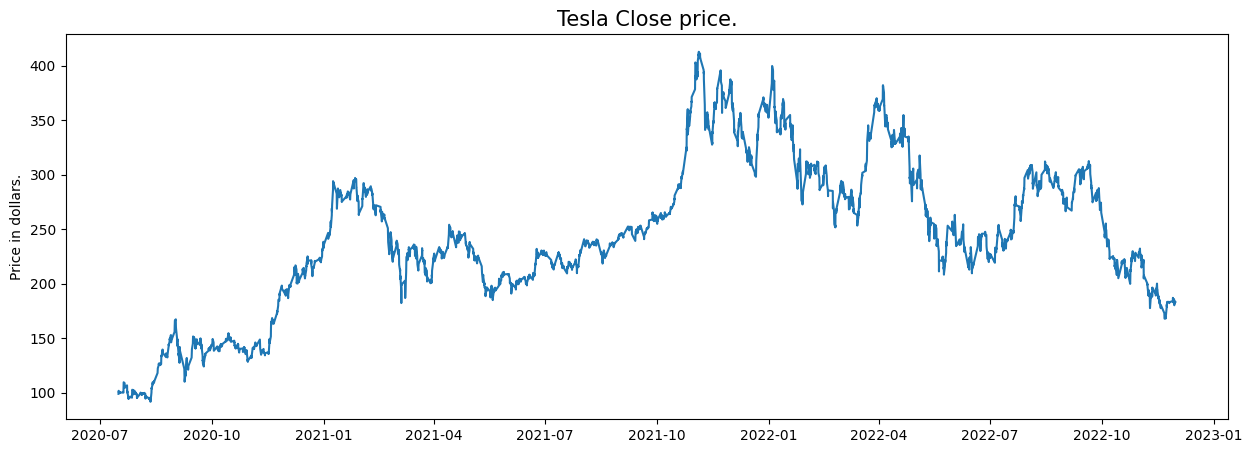

In [9]:
plt.figure(figsize=(15,5))
plt.plot(tesla_stock['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [26]:
index_x=df.drop(['Prediction'],axis='columns')
index_x=index_x[:-15]

index_y=df['Prediction']
index_y=index_y[:-15]

In [3]:

X = np.array(df.drop(['Prediction'],1))
#Remove the last 15 rows
X = X[:-15]
X

C:\Users\rohit\AppData\Local\Temp\ipykernel_2044\1594944274.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))


array([[ 98.87454224],
       [ 99.10400391],
       [ 99.39933014],
       ...,
       [182.94999695],
       [182.96000671],
       [184.16499329]])

In [4]:
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])
# Remove Last 15 rows
y = y[:-15]
y

array([100.01009369, 101.71666718, 105.77000427, ..., 180.82000732,
       183.72999573, 183.3999939 ])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [7]:
svm_confidence = svr.score(x_test, y_test)
print('svm confidence:', svm_confidence)

svm confidence: 0.9614386977676971


In [11]:
predicted=svr.predict(x_test)

In [12]:
predicted

array([236.24081956, 238.99986435, 286.54969319, 238.85404823,
       220.18400573, 205.13207116, 146.10774469, 101.91719991,
       282.78500895, 247.24329372, 277.56918214, 218.07890678,
       126.82363729, 206.01378988, 340.73096456, 280.23566655,
       337.76831682, 142.22770101, 227.11478939, 365.00625936,
       220.29732173, 297.84652034, 242.30276941, 180.56299362,
       341.91638749, 238.44964431, 226.67209695, 348.61324221,
       219.08496919, 143.13000842, 100.53211228, 238.18023638,
        98.95536448, 146.09657468, 301.43933692, 219.53129503,
        95.12094233, 172.8615977 , 136.00306275, 143.67061097,
       238.38780908, 236.59982954, 305.75009358, 247.8792037 ,
       296.9853678 , 280.14381523, 353.35650649, 193.08543646,
       217.00124315, 158.20793119, 227.43225766, 364.81772741,
       236.8084982 , 133.4522263 , 237.11209707, 194.34904477,
       237.09604444, 228.32883989, 218.07202612, 312.16345855,
       145.98531474, 270.14991384, 140.29246207, 292.78

In [28]:
predicted=pd.Series(predicted)

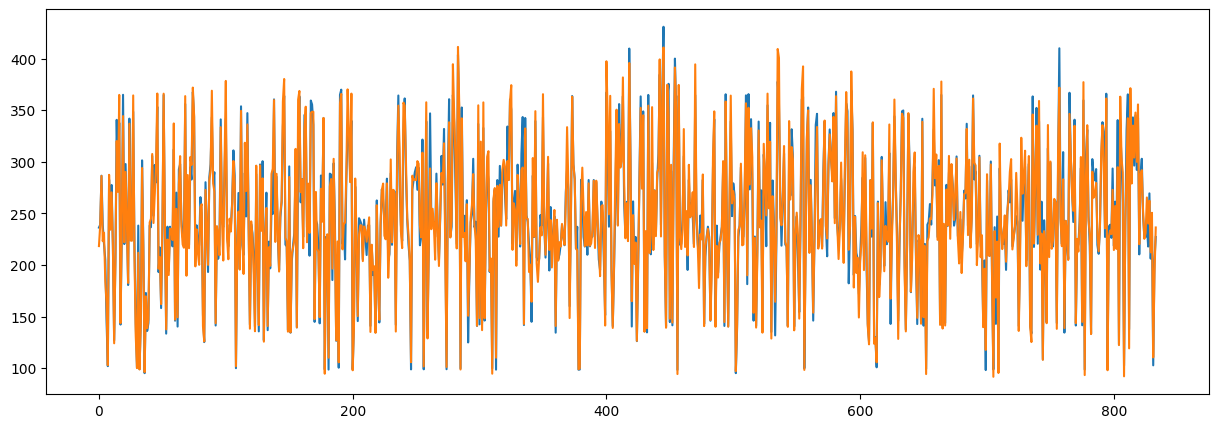

In [21]:

plt.figure(figsize=(15,5))
plt.plot(predicted)
plt.plot(y_test)